In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dataset=pd.read_csv('churn_modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
# divide dataset into independent and dependent data
X= dataset.iloc[:,3:13] 
Y=dataset.iloc[:,13]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 781.5+ KB


In [6]:
# feture engineering fix catagorical data
geography=pd.get_dummies(X["Geography"],drop_first=True).astype(int)
gender=pd.get_dummies(X["Gender"],drop_first=True).astype(int)

In [7]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [8]:
#concat this to main dataset i.e X
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,0,0,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,0,0,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,1,0


In [11]:
 # train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
# scaling process
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
# Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [14]:
# initialize the ANN
Classifier=Sequential()

In [15]:
Classifier.add(Input(shape=(11,))) 

In [16]:
Classifier.add(Dense(units=11, activation='relu')) # we create input layer in that we take 11 nodes 
# we have 11 fetures so we take 11 node and give activation function that we use in next layer

In [17]:
# create first hidden layer
Classifier.add(Dense(units=7,activation='relu'))

In [18]:
# create second hidden layer
Classifier.add(Dense(units=6,activation='relu'))

In [19]:
# create output layer
Classifier.add(Dense(units=1,activation='sigmoid'))

In [20]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [23]:
history=Classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7864 - loss: 0.5530 - val_accuracy: 0.8005 - val_loss: 0.4999
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7903 - loss: 0.5138 - val_accuracy: 0.8005 - val_loss: 0.5006
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7903 - loss: 0.5139 - val_accuracy: 0.8005 - val_loss: 0.5009
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7903 - loss: 0.5139 - val_accuracy: 0.8005 - val_loss: 0.5009
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7903 - loss: 0.5137 - val_accuracy: 0.8005 - val_loss: 0.5019
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7903 - loss: 0.5138 - val_accuracy: 0.8005 - val_loss: 0.4998
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7903 - loss: 0.5139 - val_accuracy: 0.8005 - val_loss: 0.5010
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7903 - loss: 0.5140 - val_accu

Text(0.5, 1.0, 'modelaccuracy')

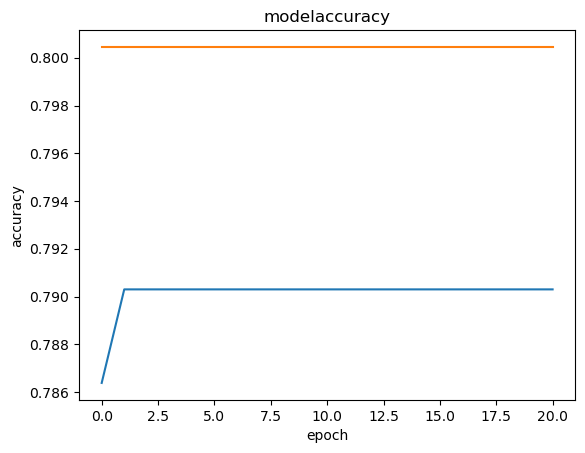

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('modelaccuracy')

Text(0.5, 1.0, 'modelaccuracy')

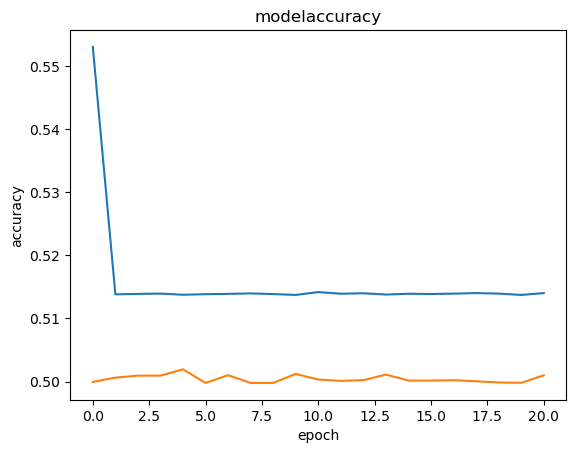

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('modelaccuracy')

In [28]:
# making a prediction 
Y_pred=Classifier.predict(X_test)
Y_pred=(Y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
#make a confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1614,    0],
       [ 387,    0]], dtype=int64)

In [31]:
#accuracy of model
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_pred)
score

0.8065967016491754

In [32]:
# show weight assign to each layer
Classifier.get_weights()

[array([[ 0.42169228,  0.30262876, -0.34514603,  0.47681558,  0.52422917,
          0.34550628, -0.44053543, -0.30109778, -0.2967595 , -0.20258369,
         -0.01584379],
        [ 0.41339132, -0.02727831, -0.2436004 , -0.34608772,  0.14690866,
         -0.33036712, -0.00284682, -0.21439795, -0.3720868 , -0.4661615 ,
         -0.4983007 ],
        [-0.14223452,  0.46608895, -0.33415258,  0.2311334 , -0.17737332,
          0.40761822,  0.43833053, -0.28691092,  0.5117356 , -0.09474619,
         -0.20386413],
        [-0.09813165,  0.5125977 , -0.13518597, -0.08389529,  0.18916687,
          0.15096249,  0.32928443,  0.26663038, -0.28760383,  0.50082475,
         -0.24717881],
        [ 0.41625208, -0.14996538, -0.27626872,  0.4152077 , -0.25640726,
         -0.29805183,  0.18157658,  0.3643818 , -0.37200058, -0.3590671 ,
         -0.3110125 ],
        [        nan,         nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         na